# Modeling and Simulation in Python

Rabbit example

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [32]:
# If you want the figures to appear in the notebook, 
# and you want to interact with them, use
# %matplotlib notebook

# If you want the figures to appear in the notebook, 
# and you don't want to interact with them, use
# %matplotlib inline

# If you want the figures to appear in separate windows, use
# %matplotlib qt5

# To switch from one to another, you have to select Kernel->Restart

%matplotlib inline

from modsim import *
import numpy as np 
import pandas as pd

This notebook develops a simple growth model, like the ones in Chapter 3, and uses it to demonstrate a parameter sweep.

The system we'll model is a rabbit farm.  Suppose you start with an initial population of rabbits and let them breed.  For simplicity, we'll assume that all rabbits are on the same breeding cycle, and we'll measure time in "seasons", where a season is the reproductive time of a rabbit.

If we provide all the food, space and other resources a rabbit might need, we expect the number of new rabbits each season to be proportional to the current population, controlled by a parameter, `birth_rate`, that represents the number of new rabbits per existing rabbit, per season.  As a starting place, I'll assume `birth_rate = 0.9`.

Sadly, during each season, some proportion of the rabbits die.  In a detailed model, we might keep track of each rabbit's age, because the chance of dying is probably highest for young and old rabbits, and lowest in between.  But for simplicity, we'll model the death process with a single parameter, `death_rate`, that represent the number
of deaths per rabbit per season.   As a starting place, I'll assume `death_rate = 0.5`.

Here's a system object that contains these parameters as well as:

* The initial population, `p0`,
* The initial time, `t0`, and
* The duration of the simulation, `t_end`, measured in seasons.

In [33]:
#files on naomi's computer here 
'''
pop=pd.read_csv("C:/ModSim/Population.csv", header=0, index_col=0)
print(pop)

rem=pd.read_csv("C:/ModSim/Removed.csv", header=0, index_col=0)
print(rem)

spy=pd.read_csv("C:/ModSim/Spayed.csv", header=0, index_col=0)
print(spy)
'''

'\npop=pd.read_csv("C:/ModSim/Population.csv", header=0, index_col=0)\nprint(pop)\n\nrem=pd.read_csv("C:/ModSim/Removed.csv", header=0, index_col=0)\nprint(rem)\n\nspy=pd.read_csv("C:/ModSim/Spayed.csv", header=0, index_col=0)\nprint(spy)\n'

In [34]:
'''
population = pop.pop
pop.head()

removed = rem.Removed
rem.head()
'''

'\npopulation = pop.pop\npop.head()\n\nremoved = rem.Removed\nrem.head()\n'

In [36]:
data=pd.read_csv("~/documents/github/modsimpy/data.csv", header = 0, index_col = 0)
print(data)

       population  spayed  removed
year                              
2017      72674.0     NaN      NaN
2016          NaN   487.0   3259.0
2015      58150.0   469.0   3812.0
2014      49209.0    40.0   1857.0
2013      40605.0   332.0   5452.0
2012      37294.0   952.0   8255.0
2011      38497.0   791.0   8529.0
2010      38365.0   429.0   7291.0
2009      36940.0     NaN   6036.0
2008      33105.0     NaN      NaN
2007      28563.0     NaN      NaN
2006      31206.0     NaN      NaN
2005      31760.0     NaN      NaN
2004      37135.0     NaN      NaN
2003      37186.0     NaN      NaN
2002      38815.0     NaN      NaN
2001      45414.0     NaN      NaN
2000      48624.0     NaN      NaN
1999      47376.0     NaN      NaN
1998      44495.0     NaN      NaN
1997      43036.0     NaN      NaN
1996      42138.0     NaN      NaN


In [37]:
data.head()

,population,spayed,removed
year,,,
2017,72674.0,NaN,NaN
2016,NaN,487.0,3259.0
2015,58150.0,469.0,3812.0
2014,49209.0,40.0,1857.0
2013,40605.0,332.0,5452.0


In [38]:
data.columns = ['population', 'spayed', 'removed']

In [39]:
data.index[-1]

1996

In [ ]:
######
#this is the first model, using a 20% growth rate 
######

In [142]:
population = data.population
removal = data.removed
#first_year = data.index[-1] #these #s are because the data is backwards 
first_year = 2009
last_year = data.index[0]
initial_population = data['population'][2009] 
growth_rate= 0.2

In [143]:
system = System(t0 = first_year, p0 = initial_population, t_end = last_year, growth_rate = growth_rate)

In [144]:
def run_simulation3(system):
    """Runs a proportional growth model.
    
    Adds TimeSeries to `system` as `results`.
    
    system: System object with t0, t_end, p0,
            birth_rate and death_rate
    """
    results = TimeSeries()
    results[system.t0] = system.p0
    for t in linrange(system.t0, system.t_end):
        growth = system.growth_rate * results[t]
        results[t+1] = results[t] + growth - data['removed'][t]
       # population_before = results[t] - data['removed'][t]
        #results[t+1] = population_before + (system.growth_rate * population_before)
    system.results = results

In [145]:
run_simulation3(system)

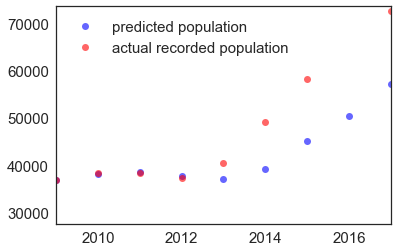

In [146]:
plot(system.results, 'bo', label = 'predicted population')
plot(population, 'ro', label='actual recorded population')
legend()


xlim(2009, 2017);

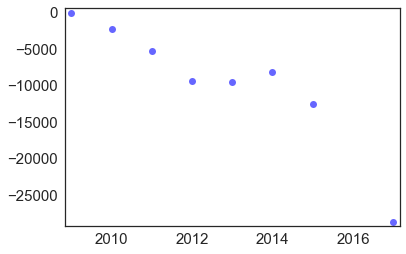

In [211]:
######
#this is a graph of how wrong the model is over time. 
stuff = population - system.results
plot(stuff, 'bo', label = 'predicted')


In [ ]:
###########
#this commented out stuff is a model with a higher growth rate for the second set 
###########

In [51]:

# population = data.population
# removal = data.removed
# #first_year = data.index[-1] #these #s are because the data is backwards 
# first_year = 2009
# last_year = data.index[0]
# initial_population = data['population'][2009] 
# growth1= 0.2
# growth2 = 0.275


In [52]:
# system = System(t0 = first_year, p0 = initial_population, t_end = last_year, growth1 = growth1, growth2=growth2)

In [53]:
# def run_simulation4(system):
#     """Runs a proportional growth model.
    
#     Adds TimeSeries to `system` as `results`.
    
#     system: System object with t0, t_end, p0,
#             birth_rate and death_rate
#     """
#     results = TimeSeries()
#     results[system.t0] = system.p0
#     for t in linrange(system.t0, system.t_end):
#         if t < 2012:
#             growth = system.growth1 * results[t]
#             results[t+1] = results[t] + growth - data['removed'][t]
#         else:
#             growth = system.growth2 * results[t]
#             results[t+1] = results[t] + growth - data['removed'][t]
#     system.results = results

In [54]:
#run_simulation4(system)

In [ ]:
####
#this is a plot of all the historic data plus the above model 

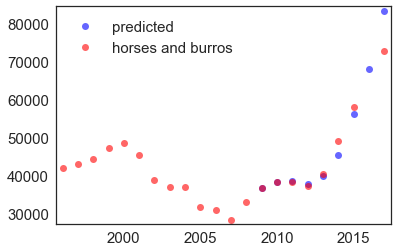

In [57]:
plot(system.results, 'bo', label = 'predicted')
plot(population, 'ro', label='horses and burros')

legend()

In [153]:
###############
#this one is about adding stochasticity to the growth rate on a gaussian dist 
###############

In [152]:
# mean and standard deviation assuming upper and lower growth rate bound 2 sd from mean
mean, standard_dev = 0.156, 0.0085 

In [156]:
rate = np.random.normal (mean, standard_dev, 10)

In [157]:
rate 

array([ 0.16181014,  0.14957447,  0.16573149,  0.15551129,  0.15818961,
        0.14578352,  0.15549106,  0.14957218,  0.16347627,  0.16660454])

In [175]:
population = data.population
removal = data.removed
#first_year = data.index[-1] #these #s are because the data is backwards 
first_year = 2009
last_year = data.index[0]
initial_population = data['population'][2009] 
mean_growth_rate = 0.25 #0.156 # mean growth rate calculated from "doubling every 4-5 years" stat
standard_dev_growth = 0.0085 #standard deviation of growth rate assuming upper and lower growth rate bound 2 sd from mean

In [176]:
system = System(t0 = first_year, p0 = initial_population, t_end = last_year, 
                mean_growth = mean_growth_rate, 
                sd_growth = standard_dev_growth)

In [177]:
def growth_rate(mean = system.mean_growth, sd = system.sd_growth): 
    rate = np.random.normal (mean, sd) 
    return rate 

In [178]:
def run_simulation4(system):
    """Runs a proportional growth model.
    
    Adds TimeSeries to `system` as `results`.
    
    system: System object with t0, t_end, p0,
            birth_rate and death_rate
    """
    results = TimeSeries()
    results[system.t0] = system.p0
    for t in linrange(system.t0, system.t_end):
        growth = growth_rate() * results[t]
        results[t+1] = results[t] + growth - data['removed'][t]
    system.results = results

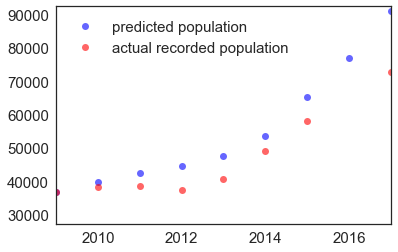

In [179]:
run_simulation4(system)
plot(system.results, 'bo', label = 'predicted population')
plot(population, 'ro', label='actual recorded population')
legend()
xlim(2009, 2017);

In [ ]:
##############
#this one is about adding fertility treatment 
##############

In [202]:
population = data.population
removal = data.removed
#first_year = data.index[-1] #these #s are because the data is backwards 
first_year = 2009
last_year = data.index[0]
initial_population = data['population'][2009] 
mean_growth_rate = 0.25 #0.156 # mean growth rate calculated from "doubling every 4-5 years" stat
#standard deviation of growth rate assuming upper and lower growth rate bound 2 sd from mean
standard_dev_growth = 0.0085 
fertility_treat_rate = 0.5 #also referred to here as "spay_rate," although it only lasts 1 year 

In [203]:
system = System(t0 = first_year, p0 = initial_population, t_end = last_year, 
                mean_growth = mean_growth_rate, 
                sd_growth = standard_dev_growth, spay_rate = fertility_treat_rate)

In [204]:
def growth_rate(mean = system.mean_growth, sd = system.sd_growth): 
    rate = np.random.normal (mean, sd) 
    return rate 

In [210]:
system.spay_rate
spayed = system.spay_rate * 100
reproducing = 100 - spayed
print (reproducing)

50.0


In [206]:
def run_simulation5(system):
    """Runs a proportional growth model.
    
    Adds TimeSeries to `system` as `results`.
    
    system: System object with t0, t_end, p0,
            birth_rate and death_rate
    """
    results = TimeSeries()
    results[system.t0] = system.p0
    for t in linrange(system.t0, system.t_end):
        spayed = system.spay_rate * results[t]
        reproducing = results[t] - spayed
        growth = growth_rate() * reproducing
        results[t+1] = results[t] + growth - data['removed'][t] + spayed
    system.results = results

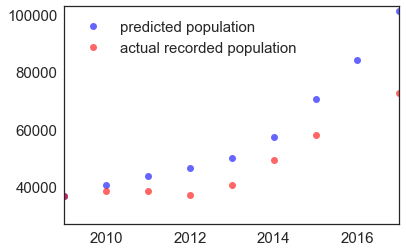

In [207]:
run_simulation4(system)
plot(system.results, 'bo', label = 'predicted population')
plot(population, 'ro', label='actual recorded population')
legend()
xlim(2009, 2017);